## 1. Import Libraries

In [159]:
import numpy as np

import pandas as pd

import sklearn

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.metrics.pairwise import rbf_kernel

from sklearn.preprocessing import (
	OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
    PowerTransformer,
    StandardScaler,
	FunctionTransformer
)

from feature_engine.outliers import Winsorizer

from sklearn.compose import ColumnTransformer

from feature_engine.datetime import DatetimeFeatures

from feature_engine.selection import SelectBySingleFeaturePerformance

from feature_engine.encoding import (
	RareLabelEncoder,
	MeanEncoder,
	CountFrequencyEncoder
)

import matplotlib.pyplot as plt

import warnings

## 2.Display Setting

In [40]:
pd.set_option("display.max_columns",None)

sklearn.set_config(transform_output= "pandas")

warnings.filterwarnings("ignore")

## 3. Read the Data

In [41]:
path = r"C:\Users\sneha\DADB\Flight-prediction-sagemaker\data\train.csv"

train = pd.read_csv(path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Spicejet,2019-05-15,Kolkata,Banglore,15:55:00,21:25:00,330,1.0,No Info,7804
1,Jet Airways,2019-05-18,Delhi,Cochin,13:25:00,12:35:00,1390,2.0,No Info,15129
2,Indigo,2019-06-06,Delhi,Cochin,23:30:00,04:35:00,305,1.0,No Info,10112
3,Jet Airways,2019-05-01,Kolkata,Banglore,14:05:00,08:15:00,1090,1.0,In-flight meal not included,8586
4,Jet Airways,2019-04-06,Banglore,Delhi,07:10:00,10:10:00,180,0.0,In-flight meal not included,4544
...,...,...,...,...,...,...,...,...,...,...
635,Indigo,2019-03-03,Delhi,Cochin,05:05:00,10:05:00,300,1.0,No Info,9581
636,Indigo,2019-06-27,Kolkata,Banglore,15:15:00,17:45:00,150,0.0,No Info,4804
637,Jet Airways,2019-05-18,Kolkata,Banglore,20:00:00,09:20:00,800,1.0,In-flight meal not included,10844
638,Vistara,2019-04-15,Banglore,Delhi,17:00:00,19:35:00,155,0.0,No Info,5613


In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          640 non-null    object 
 1   date_of_journey  640 non-null    object 
 2   source           640 non-null    object 
 3   destination      640 non-null    object 
 4   dep_time         640 non-null    object 
 5   arrival_time     640 non-null    object 
 6   duration         640 non-null    int64  
 7   total_stops      640 non-null    float64
 8   additional_info  640 non-null    object 
 9   price            640 non-null    int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 50.1+ KB


In [43]:
X_train = train.drop(columns = "price")
y_train = train.price.copy()

## 4. Transformation Operations

## 4.1 airline

In [44]:
X_train.airline


0         Spicejet
1      Jet Airways
2           Indigo
3      Jet Airways
4      Jet Airways
          ...     
635         Indigo
636         Indigo
637    Jet Airways
638        Vistara
639         Indigo
Name: airline, Length: 640, dtype: object

In [45]:
air_transformer = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy="most_frequent")),
    ("grouper",RareLabelEncoder(tol = 0.1, replace_with="Other", n_categories=2)),
    ("encoder",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))
])

air_transformer.fit_transform(X_train.loc[:, ["airline"]])

,airline_Air India,airline_Indigo,airline_Jet Airways,airline_Multiple Carriers,airline_Other
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
635,0.0,1.0,0.0,0.0,0.0
636,0.0,1.0,0.0,0.0,0.0
637,0.0,0.0,1.0,0.0,0.0
638,0.0,0.0,0.0,0.0,1.0


## 4.2 date_of_journey

In [46]:
X_train.date_of_journey


0      2019-05-15
1      2019-05-18
2      2019-06-06
3      2019-05-01
4      2019-04-06
          ...    
635    2019-03-03
636    2019-06-27
637    2019-05-18
638    2019-04-15
639    2019-05-12
Name: date_of_journey, Length: 640, dtype: object

## 4.2 date_of_journey

In [50]:
X_train.date_of_journey

0      2019-05-15
1      2019-05-18
2      2019-06-06
3      2019-05-01
4      2019-04-06
          ...    
635    2019-03-03
636    2019-06-27
637    2019-05-18
638    2019-04-15
639    2019-05-12
Name: date_of_journey, Length: 640, dtype: object

In [54]:
feature_to_extract = ["month", "week", "day_of_week", "day_of_year"]

doj_transformer = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=feature_to_extract, yearfirst=True, format="mixed")),
	("scaler", MinMaxScaler())
])

doj_transformer.fit_transform(X_train.loc[:, ["date_of_journey"]])

,date_of_journey_month,date_of_journey_week,date_of_journey_day_of_week,date_of_journey_day_of_year
0,0.666667,0.647059,0.333333,0.635593
1,0.666667,0.647059,0.833333,0.661017
2,1.000000,0.823529,0.500000,0.822034
3,0.666667,0.529412,0.333333,0.516949
4,0.333333,0.294118,0.833333,0.305085
...,...,...,...,...
635,0.000000,0.000000,1.000000,0.016949
636,1.000000,1.000000,0.500000,1.000000
637,0.666667,0.647059,0.833333,0.661017
638,0.333333,0.411765,0.000000,0.381356


## 4.3 source & destination

In [56]:
X_train.source

0       Kolkata
1         Delhi
2         Delhi
3       Kolkata
4      Banglore
         ...   
635       Delhi
636     Kolkata
637     Kolkata
638    Banglore
639    Banglore
Name: source, Length: 640, dtype: object

In [57]:
X_train.destination

0      Banglore
1        Cochin
2        Cochin
3      Banglore
4         Delhi
         ...   
635      Cochin
636    Banglore
637    Banglore
638       Delhi
639       Delhi
Name: destination, Length: 640, dtype: object

In [58]:
location_subset = X_train.loc[:, ["source", "destination"]]
location_subset

,source,destination
0,Kolkata,Banglore
1,Delhi,Cochin
2,Delhi,Cochin
3,Kolkata,Banglore
4,Banglore,Delhi
...,...,...
635,Delhi,Cochin
636,Kolkata,Banglore
637,Kolkata,Banglore
638,Banglore,Delhi


In [61]:
location_pipe1 = Pipeline(steps=[
	("grouper", RareLabelEncoder(tol=0.1, replace_with="Other", n_categories=2)),
	("encoder", MeanEncoder()),
	("scaler", PowerTransformer())
])

location_pipe1.fit_transform(location_subset, y_train)

,source,destination
0,0.156480,0.182446
1,0.934312,0.942847
2,0.934312,0.942847
3,0.156480,0.182446
4,-0.869918,-1.821668
...,...,...
635,0.934312,0.942847
636,0.156480,0.182446
637,0.156480,0.182446
638,-0.869918,-1.821668


In [62]:
def is_north(X):
    columns = X.columns.to_list()
    north_cities = ["Delhi", "Kolkata", "Mumbai", "New Delhi"]
    return(
        X
        .assign(**{
            f"{col}_is_north":X.loc[:, col].isin(north_cities).astype(int)
            for col in columns
        })
        .drop(columns=columns)
    )

In [63]:
FunctionTransformer(func=is_north).fit_transform(location_subset)

,source_is_north,destination_is_north
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
635,1,0
636,1,0
637,1,0
638,0,1


In [66]:
location_transformer = FeatureUnion(transformer_list=[
	("part1", location_pipe1),
	("part2", FunctionTransformer(func=is_north))
])

location_transformer.fit_transform(location_subset, y_train) 

,source,destination,source_is_north,destination_is_north
0,0.156480,0.182446,1,0
1,0.934312,0.942847,1,0
2,0.934312,0.942847,1,0
3,0.156480,0.182446,1,0
4,-0.869918,-1.821668,0,1
...,...,...,...,...
635,0.934312,0.942847,1,0
636,0.156480,0.182446,1,0
637,0.156480,0.182446,1,0
638,-0.869918,-1.821668,0,1


 ## 4.4 dep_time & arrival_time

In [67]:
X_train.dep_time

0      15:55:00
1      13:25:00
2      23:30:00
3      14:05:00
4      07:10:00
         ...   
635    05:05:00
636    15:15:00
637    20:00:00
638    17:00:00
639    22:10:00
Name: dep_time, Length: 640, dtype: object

In [68]:
X_train.arrival_time

0      21:25:00
1      12:35:00
2      04:35:00
3      08:15:00
4      10:10:00
         ...   
635    10:05:00
636    17:45:00
637    09:20:00
638    19:35:00
639    01:00:00
Name: arrival_time, Length: 640, dtype: object

In [69]:
time_subset = X_train.loc[:, ["dep_time", "arrival_time"]]
time_subset

,dep_time,arrival_time
0,15:55:00,21:25:00
1,13:25:00,12:35:00
2,23:30:00,04:35:00
3,14:05:00,08:15:00
4,07:10:00,10:10:00
...,...,...
635,05:05:00,10:05:00
636,15:15:00,17:45:00
637,20:00:00,09:20:00
638,17:00:00,19:35:00


In [73]:
time_pipe1 = Pipeline(steps=[
	("dt", DatetimeFeatures(features_to_extract=["hour", "minute"])),
	("scaler", MinMaxScaler())
])

time_pipe1.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute
0,0.652174,1.000000,0.913043,0.454545
1,0.565217,0.454545,0.521739,0.636364
2,1.000000,0.545455,0.173913,0.636364
3,0.608696,0.090909,0.347826,0.272727
4,0.304348,0.181818,0.434783,0.181818
...,...,...,...,...
635,0.217391,0.090909,0.434783,0.090909
636,0.652174,0.272727,0.739130,0.818182
637,0.869565,0.000000,0.391304,0.363636
638,0.739130,0.000000,0.826087,0.636364


In [86]:
def part_of_day(X, morning=4, noon=12, eve=16, night=20):
    columns = X.columns.to_list()
    X_temp = X.assign(**{
        col : pd.to_datetime(X.loc[:, col]).dt.hour
        for col in X.columns
    })

    return(
        X_temp
		.assign(**{
			f"{col}_part_of_day": np.select(
				[X_temp.loc[:, col].between(morning, noon, inclusive="left"),
				 X_temp.loc[:, col].between(noon, eve, inclusive="left"),
				 X_temp.loc[:, col].between(eve, night, inclusive="left")],
				["morning", "afternoon", "evening"],
				default="night"
			)
			for col in columns
		})
		.drop(columns=columns)
        
    )
FunctionTransformer(func=part_of_day).fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,afternoon,night
1,afternoon,afternoon
2,night,morning
3,afternoon,morning
4,morning,morning
...,...,...
635,morning,morning
636,afternoon,evening
637,night,morning
638,evening,evening


In [94]:
time_pipe2 = Pipeline(steps=[
	("part", FunctionTransformer(func=part_of_day)),
	("encoder", CountFrequencyEncoder()),
	("scaler", MinMaxScaler())
])

time_pipe2.fit_transform(time_subset)

,dep_time_part_of_day,arrival_time_part_of_day
0,0.000000,1.000000
1,0.000000,0.000000
2,0.219512,0.882979
3,0.000000,0.882979
4,1.000000,0.882979
...,...,...
635,1.000000,0.882979
636,0.000000,0.627660
637,0.219512,0.882979
638,0.185366,0.627660


In [95]:
time_transformer = FeatureUnion(transformer_list=[
	("part1", time_pipe1),
	("part2", time_pipe2)
])

time_transformer.fit_transform(time_subset)

,dep_time_hour,dep_time_minute,arrival_time_hour,arrival_time_minute,dep_time_part_of_day,arrival_time_part_of_day
0,0.652174,1.000000,0.913043,0.454545,0.000000,1.000000
1,0.565217,0.454545,0.521739,0.636364,0.000000,0.000000
2,1.000000,0.545455,0.173913,0.636364,0.219512,0.882979
3,0.608696,0.090909,0.347826,0.272727,0.000000,0.882979
4,0.304348,0.181818,0.434783,0.181818,1.000000,0.882979
...,...,...,...,...,...,...
635,0.217391,0.090909,0.434783,0.090909,1.000000,0.882979
636,0.652174,0.272727,0.739130,0.818182,0.000000,0.627660
637,0.869565,0.000000,0.391304,0.363636,0.219512,0.882979
638,0.739130,0.000000,0.826087,0.636364,0.185366,0.627660


## 4.5 duration

In [96]:
X_train.duration

0       330
1      1390
2       305
3      1090
4       180
       ... 
635     300
636     150
637     800
638     155
639     170
Name: duration, Length: 640, dtype: int64

In [97]:
(
	X_train
	.duration
	.quantile([0.25, 0.5, 0.75])
	.values
	.reshape(-1, 1)
	# .shape
)


array([[170.  ],
       [482.5 ],
       [876.25]])

In [132]:
from sklearn.base import BaseEstimator, TransformerMixin

class RBFPercentileSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, variables=None, percentiles=[0.25, 0.5, 0.75], gamma=0.1):
        self.variables = variables
        self.percentiles = percentiles
        self.gamma = gamma

    def fit(self, X, y=None):
        if not self.variables:
            self.variables = X.select_dtypes(include = "number").columns.to_list()
             
        self.reference_values_ = {
            col: (
                X
	            .loc[:, col]
	            .quantile(self.percentiles)
	            .values
	            .reshape(-1, 1)   
            )
            for col in self.variables
        }
        
        return self

    def transform(self, X):
        objects = []
        for col in self.variables:
            columns = [f"{col}_rbf_{int(percentile * 100)}" for percentile in self.percentiles]
            obj = pd.DataFrame(
                data=rbf_kernel(X.loc[:, [col]], Y=self.reference_values_[col], gamma=self.gamma),
                columns = [columns]
            )
            objects.append(obj)
        return pd.concat(objects, axis=1)     


In [133]:
RBFPercentileSimilarity(percentiles=[0.4, 0.8]).fit_transform(X_train)


,duration_rbf_40,duration_rbf_80,total_stops_rbf_40,total_stops_rbf_80
0,5.573904e-07,0.0,1.000000,1.000000
1,0.000000e+00,0.0,0.904837,0.904837
2,4.575339e-08,0.0,1.000000,1.000000
3,0.000000e+00,0.0,1.000000,1.000000
4,0.000000e+00,0.0,0.904837,0.904837
...,...,...,...,...
635,8.489044e-15,0.0,1.000000,1.000000
636,0.000000e+00,0.0,0.904837,0.904837
637,0.000000e+00,0.0,1.000000,1.000000
638,0.000000e+00,0.0,0.904837,0.904837


In [139]:
import numpy as np
import pandas as pd

def duration_category(X, short=180, med=400):
    return (
        X
        .assign(duration_cat=np.select([X.duration.lt(short),
                                        X.duration.between(short, med, inclusive="left")],
                                       ["short", "medium"],
                                       default="long"))
        .drop(columns="duration")
    )


In [140]:
def is_over(X, value=1000):
	return (
		X
		.assign(**{
			f"duration_over_{value}": X.duration.ge(value).astype(int)
		})
		.drop(columns="duration")
	)

In [143]:
duration_pipe1 = Pipeline(steps=[
	("rbf", RBFPercentileSimilarity()),
	("scaler", PowerTransformer())
])

duration_pipe2 = Pipeline(steps=[
	("cat", FunctionTransformer(func=duration_category)),
	("encoder", OrdinalEncoder(categories=[["short", "medium", "long"]]))
])

duration_union = FeatureUnion(transformer_list=[
	("part1", duration_pipe1),
	("part2", duration_pipe2),
	("part3", FunctionTransformer(func=is_over)),
	("part4", StandardScaler())
])

duration_transformer = Pipeline(steps=[
	("outliers", Winsorizer(capping_method="iqr", fold=1.5)),
	("imputer", SimpleImputer(strategy="median")),
	("union", duration_union)
])

## 4.6 total_stops

In [146]:
def is_direct(X):
	return X.assign(is_direct_flight=X.total_stops.eq(0).astype(int))


total_stops_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="most_frequent")),
	("", FunctionTransformer(func=is_direct))
])

total_stops_transformer.fit_transform(X_train.loc[:, ["total_stops"]])

,total_stops,is_direct_flight
0,1.0,0
1,2.0,0
2,1.0,0
3,1.0,0
4,0.0,1
...,...,...
635,1.0,0
636,0.0,1
637,1.0,0
638,0.0,1


## 4.7 additional_info

In [147]:
info_pipe1 = Pipeline(steps=[
	("group", RareLabelEncoder(tol=0.1, n_categories=2, replace_with="Other")),
	("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

info_pipe1.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
635,0.0,1.0,0.0
636,0.0,1.0,0.0
637,1.0,0.0,0.0
638,0.0,1.0,0.0


In [148]:
def have_info(X):
	return X.assign(additional_info=X.additional_info.ne("No Info").astype(int))
info_union = FeatureUnion(transformer_list=[
	("part1", info_pipe1),
	("part2", FunctionTransformer(func=have_info))
])
info_transformer = Pipeline(steps=[
	("imputer", SimpleImputer(strategy="constant", fill_value="unknown")),
	("union", info_union)
])

info_transformer.fit_transform(X_train.loc[:, ["additional_info"]])

,additional_info_In-flight meal not included,additional_info_No Info,additional_info_Other,additional_info
0,0.0,1.0,0.0,0
1,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0
3,1.0,0.0,0.0,1
4,1.0,0.0,0.0,1
...,...,...,...,...
635,0.0,1.0,0.0,0
636,0.0,1.0,0.0,0
637,1.0,0.0,0.0,1
638,0.0,1.0,0.0,0


## 4.8. Column Transformer

In [149]:
# column_transformer = ColumnTransformer(transformers=[
#     ("air",air_transformer,["airline"]),
#     ("doj",doj_transformer,["date_of_journey"]),
#     ("location",location_transformer,["source","destination"]),
#     ("time",time_transformer,["dep_time","arrival_time"]),
#     ("dur",duration_transformer,["duration"])
# ],remainder="passthrough")

column_transformer = ColumnTransformer(transformers=[
	("air", air_transformer, ["airline"]),
	("doj", doj_transformer, ["date_of_journey"]),
	("location", location_transformer, ["source", 'destination']),
	("time", time_transformer, ["dep_time", "arrival_time"]),
	("dur", duration_transformer, ["duration"]),
	("stops", total_stops_transformer, ["total_stops"]),
	("info", info_transformer, ["additional_info"])
], remainder="passthrough")


column_transformer.fit_transform(X_train,y_train)

,air__airline_Air India,air__airline_Indigo,air__airline_Jet Airways,air__airline_Multiple Carriers,air__airline_Other,doj__date_of_journey_month,doj__date_of_journey_week,doj__date_of_journey_day_of_week,doj__date_of_journey_day_of_year,location__source,location__destination,location__source_is_north,location__destination_is_north,time__dep_time_hour,time__dep_time_minute,time__arrival_time_hour,time__arrival_time_minute,time__dep_time_part_of_day,time__arrival_time_part_of_day,dur__x0,dur__x1,dur__x2,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight,info__additional_info_In-flight meal not included,info__additional_info_No Info,info__additional_info_Other,info__additional_info
0,0.0,0.0,0.0,0.0,1.0,0.666667,0.647059,0.333333,0.635593,0.156480,0.182446,1,0,0.652174,1.000000,0.913043,0.454545,0.000000,1.000000,-0.350572,-0.079308,-0.081895,1.0,0,-0.567241,1.0,0,0.0,1.0,0.0,0
1,0.0,0.0,1.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,0.934312,0.942847,1,0,0.565217,0.454545,0.521739,0.636364,0.000000,0.000000,-0.350572,-0.079308,-0.081895,2.0,1,1.644943,2.0,0,0.0,1.0,0.0,0
2,0.0,1.0,0.0,0.0,0.0,1.000000,0.823529,0.500000,0.822034,0.934312,0.942847,1,0,1.000000,0.545455,0.173913,0.636364,0.219512,0.882979,-0.350572,-0.079308,-0.081895,1.0,0,-0.619415,1.0,0,0.0,1.0,0.0,0
3,0.0,0.0,1.0,0.0,0.0,0.666667,0.529412,0.333333,0.516949,0.156480,0.182446,1,0,0.608696,0.090909,0.347826,0.272727,0.000000,0.882979,-0.350572,-0.079308,-0.081895,2.0,1,1.018853,1.0,0,1.0,0.0,0.0,1
4,0.0,0.0,1.0,0.0,0.0,0.333333,0.294118,0.833333,0.305085,-0.869918,-1.821668,0,1,0.304348,0.181818,0.434783,0.181818,1.000000,0.882979,-0.347443,-0.079308,-0.081895,1.0,0,-0.880286,0.0,1,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.016949,0.934312,0.942847,1,0,0.217391,0.090909,0.434783,0.090909,1.000000,0.882979,-0.350572,-0.079308,-0.081895,1.0,0,-0.629850,1.0,0,0.0,1.0,0.0,0
636,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,0.500000,1.000000,0.156480,0.182446,1,0,0.652174,0.272727,0.739130,0.818182,0.000000,0.627660,-0.350572,-0.079308,-0.081895,0.0,0,-0.942895,0.0,1,0.0,1.0,0.0,0
637,0.0,0.0,1.0,0.0,0.0,0.666667,0.647059,0.833333,0.661017,0.156480,0.182446,1,0,0.869565,0.000000,0.391304,0.363636,0.219512,0.882979,-0.350572,-0.079308,-0.081895,2.0,0,0.413633,1.0,0,1.0,0.0,0.0,1
638,0.0,0.0,0.0,0.0,1.0,0.333333,0.411765,0.000000,0.381356,-0.869918,-1.821668,0,1,0.739130,0.000000,0.826087,0.636364,0.185366,0.627660,-0.350572,-0.079308,-0.081895,0.0,0,-0.932460,0.0,1,0.0,1.0,0.0,0


## 5. Feature Selection

In [154]:
estimator = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=42)

selector = SelectBySingleFeaturePerformance(
	estimator=estimator,
	scoring="r2",
	threshold=0.1
) 

## 6. Putting it all Together

In [155]:
preprocessor = Pipeline(steps=[
	("ct", column_transformer),
	("selector", selector)
])

preprocessor.fit_transform(X_train, y_train)

,air__airline_Indigo,air__airline_Jet Airways,air__airline_Other,doj__date_of_journey_week,doj__date_of_journey_day_of_year,location__source,dur__duration_cat,dur__duration_over_1000,dur__duration,stops__total_stops,stops__is_direct_flight
0,0.0,0.0,1.0,0.647059,0.635593,0.156480,1.0,0,-0.567241,1.0,0
1,0.0,1.0,0.0,0.647059,0.661017,0.934312,2.0,1,1.644943,2.0,0
2,1.0,0.0,0.0,0.823529,0.822034,0.934312,1.0,0,-0.619415,1.0,0
3,0.0,1.0,0.0,0.529412,0.516949,0.156480,2.0,1,1.018853,1.0,0
4,0.0,1.0,0.0,0.294118,0.305085,-0.869918,1.0,0,-0.880286,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,0.0,0.0,0.000000,0.016949,0.934312,1.0,0,-0.629850,1.0,0
636,1.0,0.0,0.0,1.000000,1.000000,0.156480,0.0,0,-0.942895,0.0,1
637,0.0,1.0,0.0,0.647059,0.661017,0.156480,2.0,0,0.413633,1.0,0
638,0.0,0.0,1.0,0.411765,0.381356,-0.869918,0.0,0,-0.932460,0.0,1


## 7. Visualizations

In [156]:
feature_performances = preprocessor.named_steps["selector"].feature_performance_
feature_performances

{'air__airline_Air India': -0.00016632380674619363,
 'air__airline_Indigo': 0.1393687056451425,
 'air__airline_Jet Airways': 0.18081511423841365,
 'air__airline_Multiple Carriers': 0.009623004489700401,
 'air__airline_Other': 0.1078631449145551,
 'doj__date_of_journey_month': 0.06605587180488907,
 'doj__date_of_journey_week': 0.17508362913869793,
 'doj__date_of_journey_day_of_week': -0.008898018459973586,
 'doj__date_of_journey_day_of_year': 0.2542295332882619,
 'location__source': 0.13182684558587884,
 'location__destination': 0.09861124200778677,
 'location__source_is_north': 0.005881904365703498,
 'location__destination_is_north': 0.005881904365703498,
 'time__dep_time_hour': -0.012829036132903168,
 'time__dep_time_minute': 0.03853885374661433,
 'time__arrival_time_hour': 0.08108610856822455,
 'time__arrival_time_minute': 0.03428576481561892,
 'time__dep_time_part_of_day': -0.005845497295850081,
 'time__arrival_time_part_of_day': 0.02066539215446687,
 'dur__x0': 0.09992300077558798,

In [157]:
sorted_feat_imp = dict(sorted(feature_performances.items(), key=lambda val: val[1]))
sorted_feat_imp

{'time__dep_time_hour': -0.012829036132903168,
 'dur__x1': -0.012083871927539791,
 'doj__date_of_journey_day_of_week': -0.008898018459973586,
 'info__additional_info_No Info': -0.006243731320709618,
 'info__additional_info': -0.006243731320709618,
 'time__dep_time_part_of_day': -0.005845497295850081,
 'info__additional_info_In-flight meal not included': -0.0004314995760991147,
 'air__airline_Air India': -0.00016632380674619363,
 'dur__x2': 0.0007883452784992473,
 'info__additional_info_Other': 0.004496932447638047,
 'location__source_is_north': 0.005881904365703498,
 'location__destination_is_north': 0.005881904365703498,
 'air__airline_Multiple Carriers': 0.009623004489700401,
 'time__arrival_time_part_of_day': 0.02066539215446687,
 'time__arrival_time_minute': 0.03428576481561892,
 'time__dep_time_minute': 0.03853885374661433,
 'doj__date_of_journey_month': 0.06605587180488907,
 'time__arrival_time_hour': 0.08108610856822455,
 'location__destination': 0.09861124200778677,
 'dur__x0':

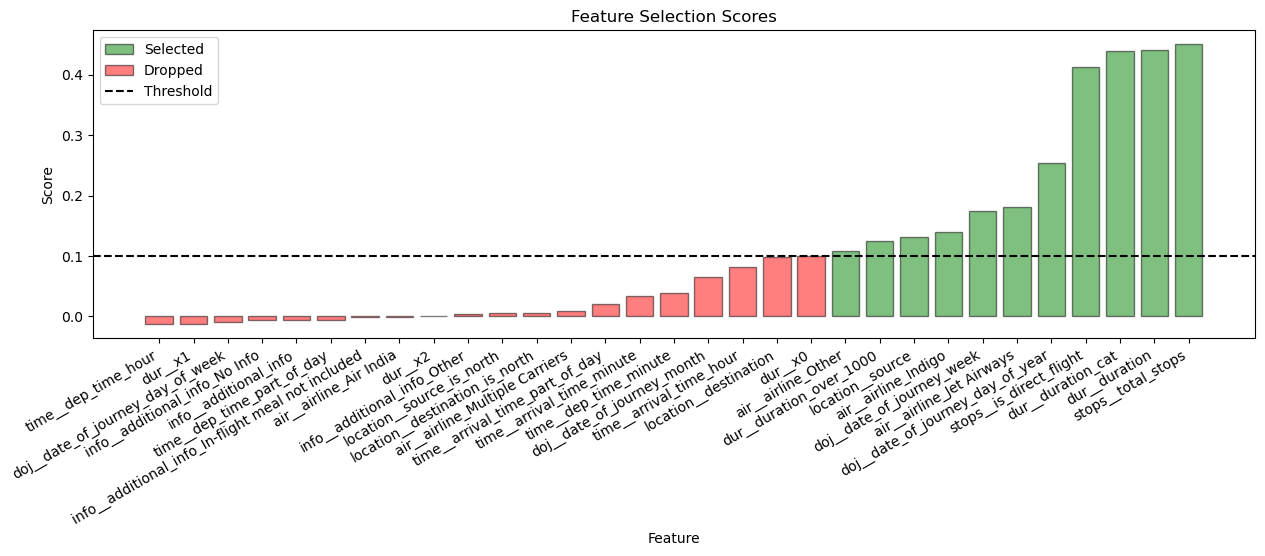

In [160]:
THRESHOLD = 0.1

selected_bar = None
dropped_bar = None
colors = ["red" if score < THRESHOLD else "green" for score in sorted_feat_imp.values()]


fig, ax = plt.subplots(figsize=(15, 4)) 

for i, (feature, score) in enumerate(sorted_feat_imp.items()):
	params = dict(
		x=i,
		height=score,
		edgecolor="black",
		alpha=0.5
	)
	
	if score < THRESHOLD:
		bar = ax.bar(
			color="red",
			**params
		)
		if not dropped_bar:
			dropped_bar = bar[0]
	else:
		bar = ax.bar(
			color="green",
			**params
		)
		if not selected_bar:
			selected_bar = bar[0]

thresh_line = ax.axhline(
	y=0.1,
	color="black",
	linestyle="--"
)

ax.set_xticks(
	ticks=range(len(sorted_feat_imp)),
	labels=list(sorted_feat_imp.keys()),
	rotation=30,
	ha="right"
)

ax.set(
	xlabel="Feature",
	ylabel="Score",
	title="Feature Selection Scores"
)

ax.legend(
	handles=[selected_bar, dropped_bar, thresh_line],
	labels=["Selected", "Dropped", "Threshold"],
	loc="upper left"
)

plt.show()